## Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).

In [27]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
import hdbscan


In [28]:
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]
        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

In [29]:
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
labels_true = iris.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
print("Bentuk data asli:", X.shape)
print("Bentuk data setelah reduksi PCA:", X_reduced.shape)
print("-" * 30)


Bentuk data asli: (150, 4)
Bentuk data setelah reduksi PCA: (150, 2)
------------------------------


## Lakukan clustering dengan HDBSCAN.

In [30]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
clusterer.fit(X)
hdbscan_labels = clusterer.labels_

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Laporkan hasil:

Jumlah cluster yang terbentuk.

Banyaknya noise.

Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu, dikarenakan visualisasi hanya dapat dilakukan hingga 3 dimensi).

Jumlah cluster yang terbentuk oleh HDBSCAN: 2
Banyaknya data yang dianggap noise: 0


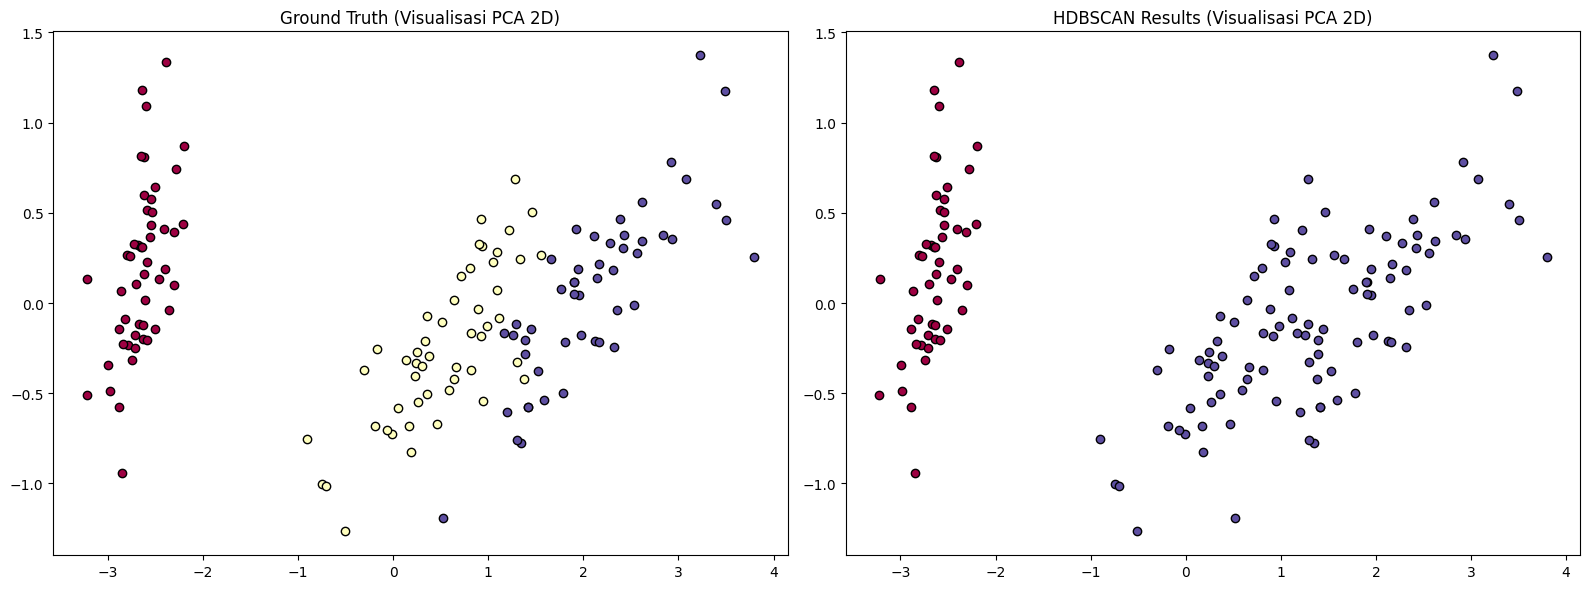

In [31]:
num_clusters = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)

num_noise = np.sum(hdbscan_labels == -1)

print(f"Jumlah cluster yang terbentuk oleh HDBSCAN: {num_clusters}")
print(f"Banyaknya data yang dianggap noise: {num_noise}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot(X_reduced, labels=labels_true, ground_truth=True, ax=axes[0])
axes[0].set_title('Ground Truth (Visualisasi PCA 2D)')

plot(X_reduced, labels=hdbscan_labels, parameters={"min_cluster_size": 5}, ax=axes[1])
axes[1].set_title('HDBSCAN Results (Visualisasi PCA 2D)')

plt.show()

## Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

HDBSCAN berhasil memisahkan kelas Iris-setosa dengan baik karena memiliki kepadatan yang jelas dan terpisah. Namun, algoritma ini menggabungkan kelas Iris-versicolor dan Iris-virginica menjadi satu cluster karena keduanya memiliki tumpang tindih yang signifikan dan tidak memiliki batas kepadatan yang jelas di antara mereka. HDBSCAN juga mengidentifikasi beberapa data sebagai noise.

Secara keseluruhan, HDBSCAN efektif dalam menemukan cluster yang padat, tetapi kurang optimal untuk data dengan cluster yang tumpang tindih.